<a href="https://colab.research.google.com/github/Asandandlela16/Air-Quality-Monitoring-in-India/blob/main/AIR%20QUALITY%20MONITORING%20IN%20INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIR QUALITY MONITORING IN INDIA

### Import the necessary libraries

In [ ]:
from IPython.display import Image, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.simplefilter('ignore')

### DATASET SUMMARY

import the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_india_air_quality.csv to data_india_air_quality.csv


In [ ]:
dataset = pd.read_csv('data_india_air_quality.csv', encoding='latin1')
dataset.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


STATISTICAL ANALYSIS OF THE DATASET

In [ ]:
dataset.describe()

,so2,no2,rspm,spm
count,401096.000000,419509.000000,395520.000000,198355.000000
mean,10.829414,25.809623,108.832784,220.783480
std,11.177187,18.503086,74.872430,151.395457
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,14.000000,56.000000,111.000000
50%,8.000000,22.000000,90.000000,187.000000
75%,13.700000,32.200000,142.000000,296.000000
max,909.000000,876.000000,6307.033333,3380.000000


This dataset focuses on four major air pollutants measured across various Inidan states and cities over time. These pollutants include :
Sulphur dioxide(SO2) and nitrogen dioxide(NO2).These are harmful gaseous emissions.

Respirable Suspended Particulate Matter(RSPM): This falls under the catergory of suspended particulate matter, which are tiny particles that linger in the air 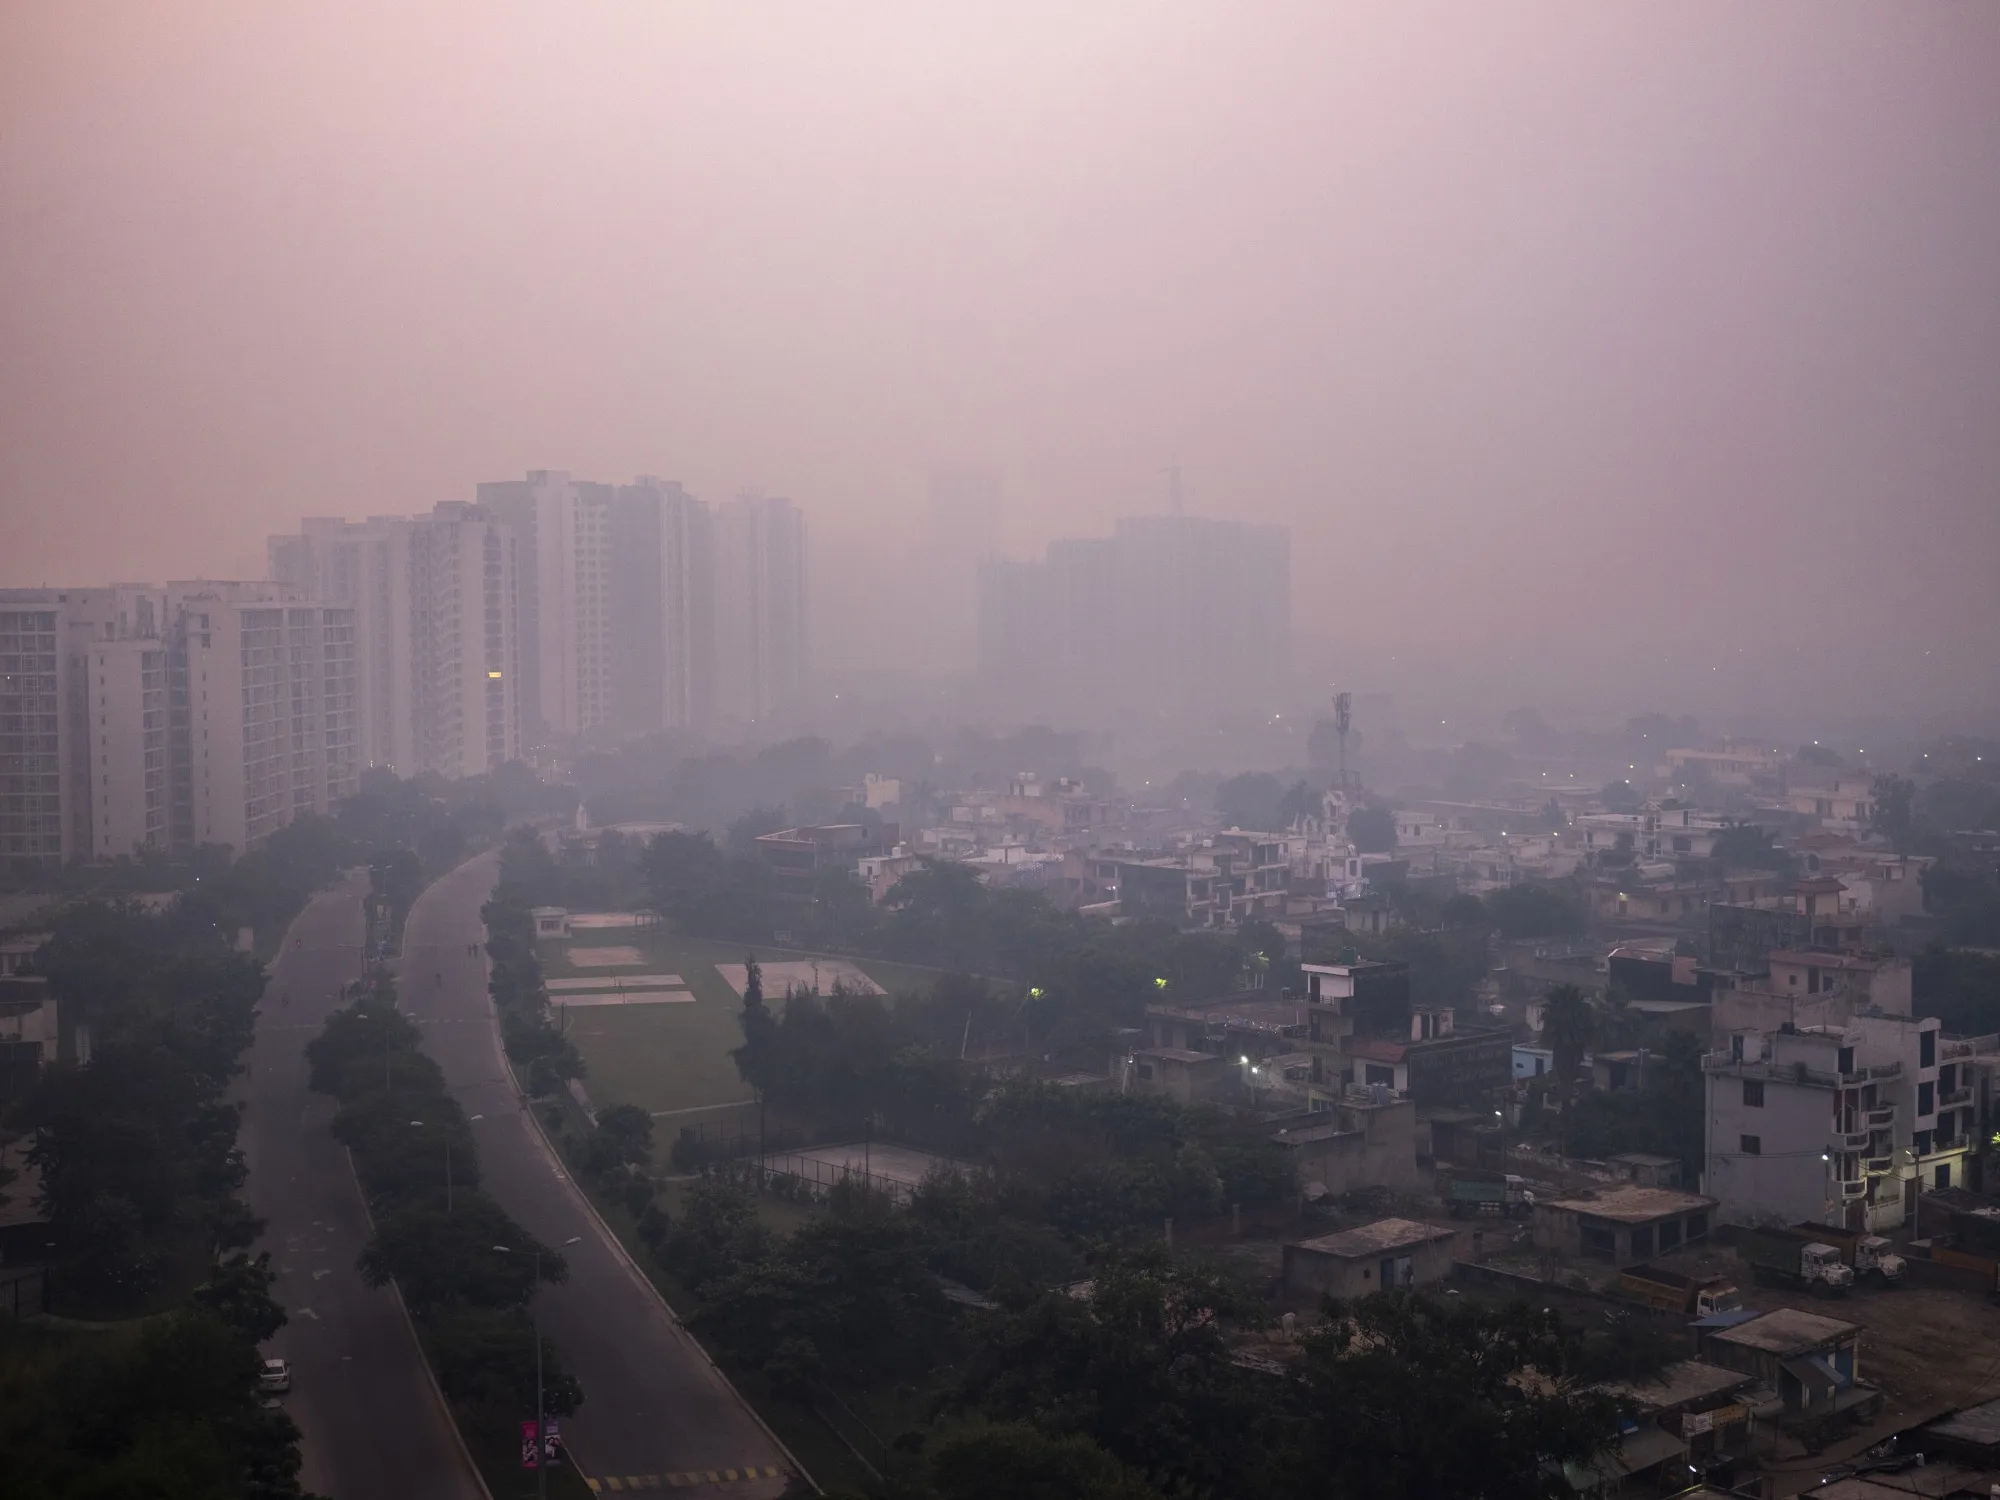

### Column definitions and null values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  date                         435735 non-null  object 
dtypes: float64(4), object(8)
memory usage: 39.9+ MB


In [ ]:
dataset.describe()

,so2,no2,rspm,spm
count,401096.000000,419509.000000,395520.000000,198355.000000
mean,10.829414,25.809623,108.832784,220.783480
std,11.177187,18.503086,74.872430,151.395457
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,14.000000,56.000000,111.000000
50%,8.000000,22.000000,90.000000,187.000000
75%,13.700000,32.200000,142.000000,296.000000
max,909.000000,876.000000,6307.033333,3380.000000


In [ ]:
dataset.isnull().sum()

,0
stn_code,144077
sampling_date,3
state,0
location,3
agency,149481
type,5393
so2,34646
no2,16233
rspm,40222
spm,237387


So you can see that our dataset is not clean at all with amy missing values and some variables having wrong data types so we need to clean the data.

 Display the first few rows for inspection

In [ ]:
dataset.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


## **DATA** **CLEANING**

In [ ]:
# remove unnecessary columns from the dataset
# 'stn_code', 'agency', 'sampling date', 'location_monitoring_station' are all needless so we may drop them
# axis=1 indicate columns and inplace=True modifies the original dataset
dataset.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True)

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   date      435735 non-null  object 
dtypes: float64(4), object(4)
memory usage: 26.6+ MB


,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,3/1/1990


### Missing values analysis

In [ ]:
total_missing = dataset.isnull().sum()

# filter out columns with no missing values
total_missing = total_missing[total_missing !=0]

# Let's sort the columns by the number of missing values in descending order
total_missing=total_missing.sort_values(ascending=False)

# calculate the percentage of missing values for each column
percentage_missing = round(total_missing/len(dataset)* 100 , 2)

# Create a DataFrame to display total missing values and percentage
missing_data_summary =pd.concat([total_missing, percentage_missing], axis=1, keys=['Total_missing','Percentage'])

# display the missing data summary
missing_data_summary

,Total_missing,Percentage
spm,237387,54.48
rspm,40222,9.23
so2,34646,7.95
no2,16233,3.73
type,5393,1.24
date,7,0.00
location,3,0.00


### REMOVE **OUTLIERS**

outliers can have a significant effect on the mean specifically so it's a good thing to check if they exist and remove them from the dataset as they may lead to skewed readings for our visualizations and model performance and metrics

In [ ]:
def remove_outlier(df_in, col_name) :
  q1=df_in[col_name].quantile(0.25)
  q3=df_in[col_name].quantile(0.75)
  iqr=q3 - q1 #interquartile range
  lower_bound= q1 - 1.5*iqr
  upper_bound= q3 + 1.5*iqr

  df_out = df_in.loc[(df_in[col_name] >lower_bound) & (df_in[col_name]< upper_bound)]
  return df_out

# Remove outliers from specific columns in the dataset
dataset=remove_outlier(dataset, 'spm')
dataset=remove_outlier(dataset, 'rspm')
dataset=remove_outlier(dataset, 'so2')
dataset=remove_outlier(dataset, 'no2')



### GROUP THE DATASET BY STATE

In [ ]:
# group the datasets by 'state' and calculate the mean values of 'rspm','spm','so2' and 'no2'

state_pollutants_mean = dataset.groupby('state')[['rspm','spm', 'no2','so2']].mean()

# Display
state_pollutants_mean


,rspm,spm,no2,so2
state,,,,
Andhra Pradesh,82.605694,202.949731,25.228434,6.530050
Assam,86.802639,144.305519,14.645568,6.619550
Bihar,97.701133,237.932011,30.127620,9.348159
Chandigarh,96.302260,191.032015,19.650942,3.406497
Chhattisgarh,122.578764,225.516957,25.854929,14.914707
Dadra & Nagar Haveli,86.418605,216.538206,17.459136,9.552159
Daman & Diu,84.715719,208.578595,17.620401,9.274247
Delhi,125.788052,314.634805,39.354961,7.057662
Goa,65.458829,43.627672,12.900961,7.234538


#### Handle missing values

In [ ]:
# Group the dataset by state

by_state = dataset.groupby('state')

# Define a function that will fill in missing values with means

def fill_mean(series) :
  return series.fillna(series.mean())

# Apply this function to each column

dataset['rspm'] = by_state['rspm'].transform(fill_mean)
dataset['spm'] = by_state['spm'].transform(fill_mean)
dataset['so2'] = by_state['so2'].transform(fill_mean)
dataset['no2'] = by_state['no2'].transform(fill_mean)



## DERIVATION FOR INDIVIDUAL POLLUTANT INDEX AND AQI

The AQI(Air Quality Index) is ametric used to report daily air quality, indicating how clean or polluted the air is and the associated heakth effects. It focuses on short-term health effects from exposure to pollutants. The AQI is calculated for five majorair pollutants: ground-level ozone, particulate matter(PM), carbon monoxide(CO), Sulphur dioxide(S02), and Nitrogen Dioxide(NO2), each with its own national air quality standard.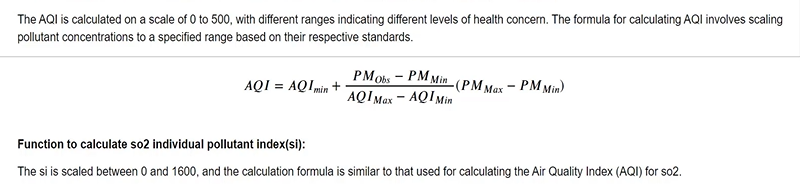

The si helps us to understand the concentration of SO2

In [ ]:
def calculate_si(so2) :
  si = 0

  if so2 <= 40 :
    si = so2 * (50/40)
  elif so2 > 40 and so2 <= 80 :
    si = 50 + (so2 - 40) * (50/40)
  elif so2 > 80 and so2 <= 380 :
    si = 100 + (so2 - 80) *(100/300)
  elif so2 > 380 and so2 <= 800 :
    si= 200 + (so2 - 380)  * (100/400)
  elif so2 > 800 and so2 <= 1600 :
    si = 300 + (so2 - 800) * (100/800)
  elif so2 > 1600 :
    si = 400 +(so2 -1600) * (100/800)
  return si

# Now apply the above function to the 'so2' and create a new 'si' column
dataset['si'] = dataset['so2'].apply(calculate_si)

#select the 'so2' and 'si' columns from the dataset
df = dataset[['so2', 'si']]

# display the first new rows of the new dataframe
df.head()

,so2,si
1036,12.9,16.125
1037,10.4,13.000
1038,7.6,9.500
1039,7.3,9.125
1042,6.2,7.750


### Function to calculate no2 individual pollutant index(ni)

In [ ]:
def calculate_ni(no2) :
  ni = 0

  if no2 <= 40 :
    ni = no2 * (50/40)
  elif no2 > 40 and no2 <= 80 :
    ni = 50 + (no2 - 40) * (50/40)
  elif no2 > 80 and no2 <= 180 :
    ni = 100 + (no2 - 80) *(100/100)
  elif no2 > 180 and no2 <= 280 :
    ni= 200 + (no2 - 180) * (100/100)
  elif no2 > 280 and no2 <= 400 :
    ni = 300 + (no2 - 280) * (100/120)
  else :
    ni = 400 + (no2 - 400) * (100/120)

  return ni
# Now apply the above function to the 'no2' and create a new 'ni' column
dataset['ni'] = dataset['no2'].apply(calculate_ni)

#select the 'no2' and 'ni' columns from the dataset
df = dataset[['no2', 'ni']]

# display the first new rows of the new dataframe
df.head()


,no2,ni
1036,55.8,69.750
1037,48.9,61.125
1038,50.1,62.625
1039,48.5,60.625
1042,41.6,52.000


#### Function to calculate rspm individual pollutant index(rpi)

The index category for rspm ranges between 0 and 400

In [ ]:
def calculate_rpi(rspm) :
  rpi = 0

  if rspm <= 30 :
    rpi = rspm * (50/30)
  elif rspm > 30 and rspm <= 60 :
    rpi = 50 + (rspm - 30) * (50/30)
  elif rspm > 60 and rspm <= 90 :
    rpi = 100 + (rspm - 60) *(100/30)
  elif rspm > 90 and rspm <= 120 :
    rpi= 200 + (rspm - 90) * (100/30)
  elif rspm > 120 and rspm <= 250 :
    rpi = 300 + (rspm - 120) * (100/130)
  else :
    rpi = 400 + (rspm - 250) * (100/130)
  return rpi

# Now apply the above function to the 'no2' and create a new 'ni' column
dataset['rpi'] = dataset['rspm'].apply(calculate_rpi)

#select the 'rspm' and 'rpi' columns from the dataset
df = dataset[['rspm', 'rpi']]

# display the first new rows of the new dataframe
df.head()



,rspm,rpi
1036,143.7,318.230769
1037,124.7,303.615385
1038,88.0,193.333333
1039,82.7,175.666667
1042,84.7,182.333333


### Function to clalculate spi

In [ ]:
def calculate_spi(spm) :
  spi = 0

  if spm <= 50 :
    spi = spm * (50/50)
  elif spm > 50 and spm <= 100 :
    spi = 50 + (spm - 50) * (50/50)
  elif spm > 100 and spm <= 250 :
    spi = 100 + (spm - 100) *(100/150)
  elif spm > 250 and spm <= 350 :
    spi= 200 + (spm - 250) *(100/100)
  elif spm > 350 and spm <= 430 :
    spi = 300 + (spm - 350) * (100/80)
  else :
    spi = 400 + (spm - 430) * (100/430)
  return spi

# Now apply the above function to the 'no2' and create a new 'ni' column
dataset['spi'] = dataset['spm'].apply(calculate_spi)

#select the 'rspm' and 'rpi' columns from the dataset
df = dataset[['spm', 'spi']]

# display the first new rows of the new dataframe
df.head()

,spm,spi
1036,370.7,325.875000
1037,285.7,235.700000
1038,221.3,180.866667
1039,186.7,157.800000
1042,219.3,179.533333


### The function calculates the Air Quality Index(AQI) for each data value according to Indian Government standards

The AQI is a measure that helps individuals understand the health implications of local air quality . It is scaled from 0 t0 500.

In [ ]:
def calculate_aqi(si, ni, spi, rpi) :
  aqi = 0
  if si > ni  and si > spi and si > rpi :
    aqi = si
  if spi > si and spi > ni and spi > rpi :
    aqi + spi
  if ni > si and ni > spi and ni > rpi :
    aqi = ni
  if rpi> si and rpi > ni and rpi > spi :
    nqi = rpi

  return aqi

  # Apply the function to each row of the dataset

dataset['aqi'] = dataset.apply(lambda x: calculate_aqi(x['si'], x['ni'], x['spi'], x['rpi']), axis=1)

  # Create a new DataFrame with selected columns for analysis
df=dataset[['state', 'si', 'ni','rpi', 'spi','aqi']]

  # Dispay
df.head()

,state,si,ni,rpi,spi,aqi
1036,Andhra Pradesh,16.125,69.750,318.230769,325.875000,0.0
1037,Andhra Pradesh,13.000,61.125,303.615385,235.700000,0.0
1038,Andhra Pradesh,9.500,62.625,193.333333,180.866667,0.0
1039,Andhra Pradesh,9.125,60.625,175.666667,157.800000,0.0
1042,Andhra Pradesh,7.750,52.000,182.333333,179.533333,0.0


# **EXPlORATORY DATA ANALYSIS( EDA)**

### 1.Pointplot

In [ ]:
# fill Nan values with 0.0 inplace
dataset.fillna(0.0, inplace=True)

# Select numeric columns from the dataset
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

# Group the data by 'state' and 'location' and calculate the mean of the numeric columns(mean for each state)
state=dataset.groupby(['state'])[numeric_columns].mean().reset_index()


Create 2x2 grids of subplots

<Axes: title={'center': 'States and SPM levels'}, xlabel='state'>

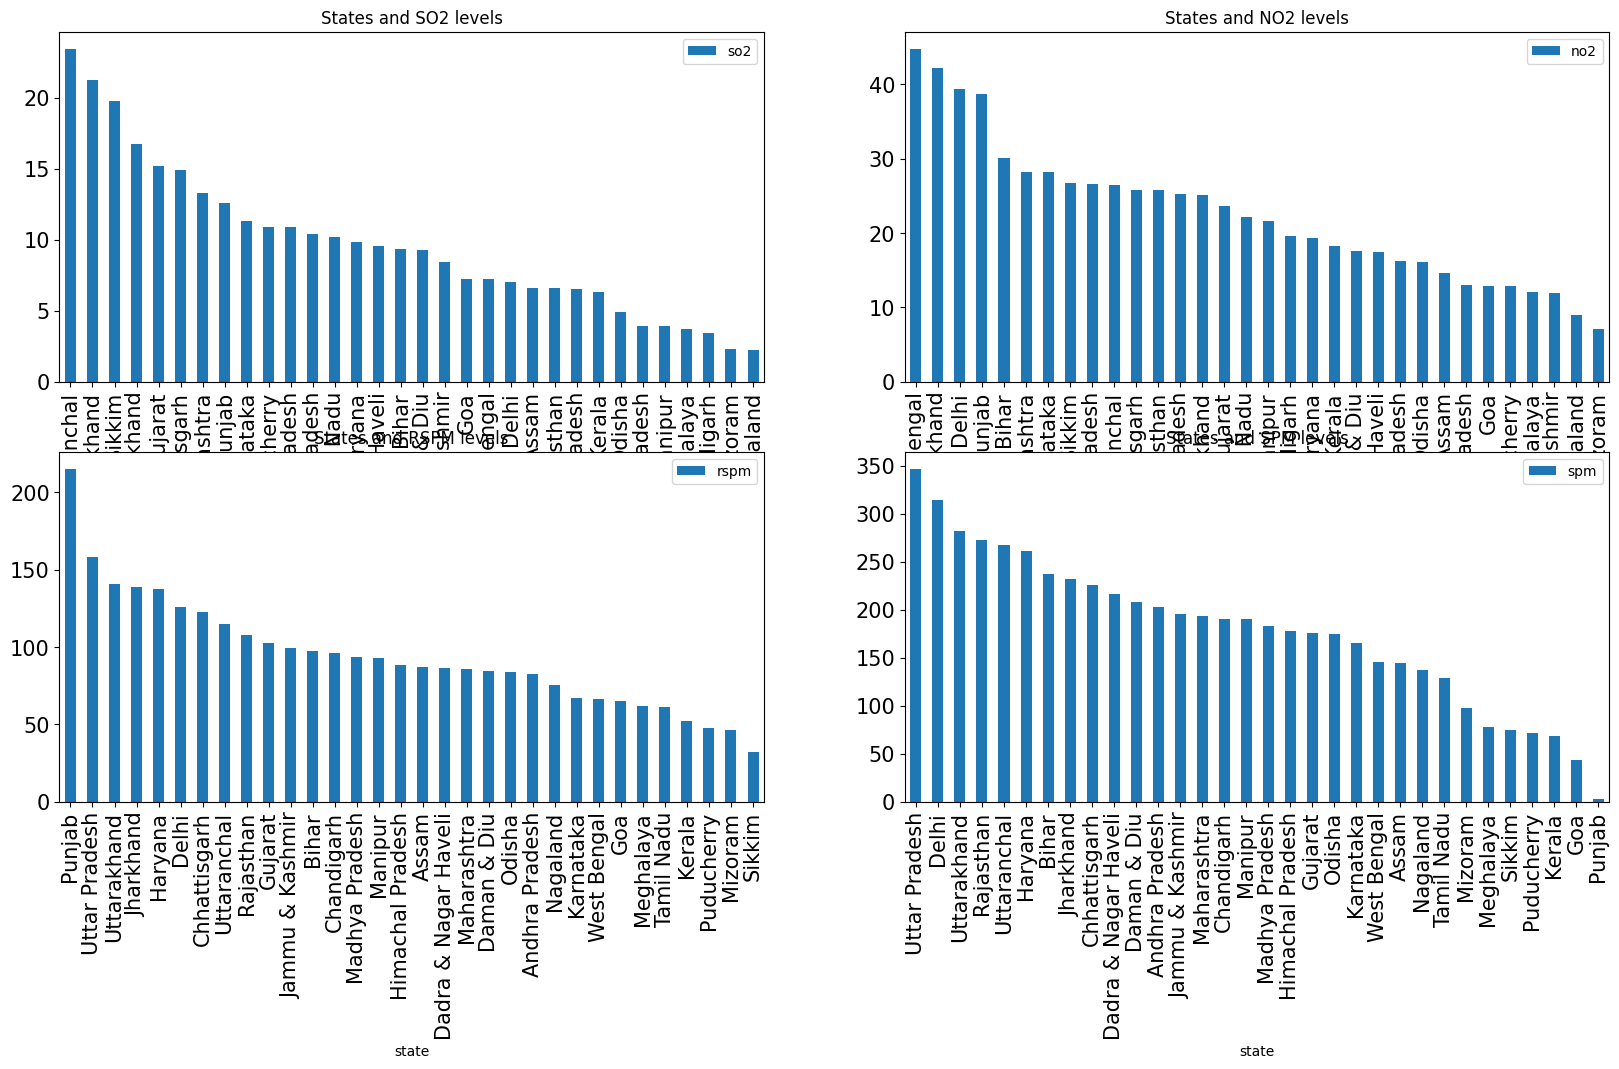

In [ ]:
fig, axes =plt.subplots(nrows=2, ncols=2, figsize=(40, 40))

#SO2 levels by state
state_pollution = dataset[['state', 'so2']].groupby('state').mean()
state_pollution.reset_index(inplace=True)
state_pollution.sort_values(by='so2', ascending=False, inplace=True)
state_pollution.plot(kind='bar' , figsize=(20,10), x='state', fontsize=15 ,
                     title="States and SO2 levels", ax=axes[0][0])

#NO2 levels by state
state_pollution = dataset[['state', 'no2']].groupby('state').mean()
state_pollution.reset_index(inplace=True)
state_pollution.sort_values(by='no2', ascending=False, inplace=True)
state_pollution.plot(kind='bar' , figsize=(20,10), x='state', fontsize=15 ,
                     title="States and NO2 levels", ax=axes[0][1])
# RSPM levels by state
state_pollution = dataset[['state', 'rspm']].groupby('state').mean()
state_pollution.reset_index(inplace=True)
state_pollution.sort_values(by='rspm', ascending=False, inplace=True)
state_pollution.plot(kind='bar' , figsize=(20,10), x='state', fontsize=15 ,
                     title="States and RSPM levels", ax=axes[1][0])

# SPM levels by state
state_pollution = dataset[['state', 'spm']].groupby('state').mean()
state_pollution.reset_index(inplace=True)
state_pollution.sort_values(by='spm', ascending=False, inplace=True)
state_pollution.plot(kind='bar' , figsize=(20,10), x='state', fontsize=15 ,
                     title="States and SPM levels", ax=axes[1][1 ])


## 2. HEATMAP

We want to visualize correlation which is a statistical measure of association between two variable indicating the degree of linearity between those variables. So we do that with a heatmap

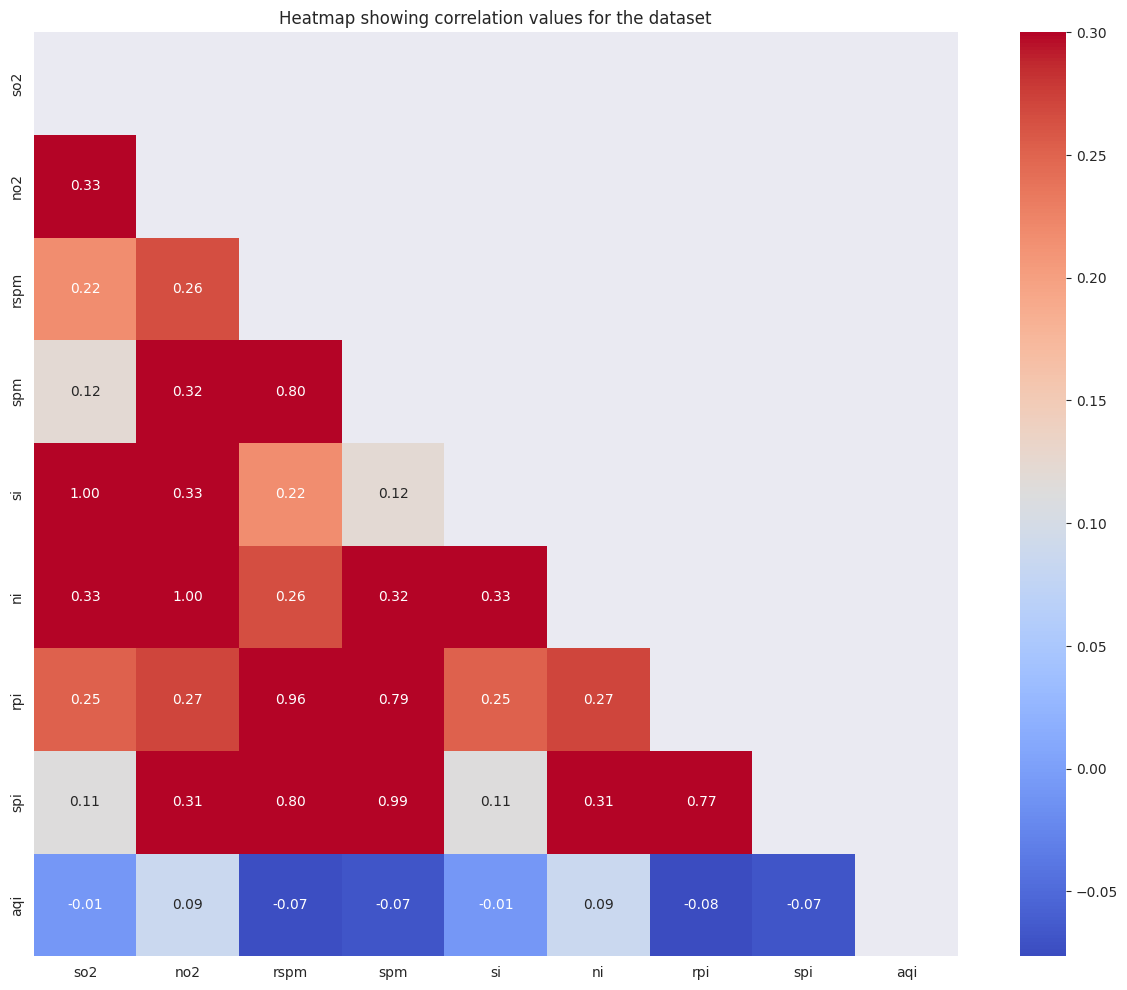

In [ ]:
#select only numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

#calculate corr matrix
correlation_matrix = dataset[numeric_columns].corr()

#Plot the heatmap
plt.figure(figsize=(16, 12))
ax=plt.axes

# Create a mask for the upper triangle
mask=np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)]= True

# Plot the matrix
with sns.axes_style("dark") :
  ax=sns.heatmap(data=correlation_matrix, mask=mask, vmax=.3 , annot=True, fmt='.2f', square=True, cmap='coolwarm')

ax.set_title("Heatmap showing correlation values for the dataset")
plt.show()

Categoral conversion

In [ ]:
# convert the state column to a categorical type
dataset['state_label']=dataset['state'].astype('category')

# select only cagegrical colmns
cat_columns = dataset.select_dtypes(['category']).columns

# convert categorical columns to numeric codes or binary
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
# Convert type column to string type
dataset['type_label'] = dataset['type'].astype(str)

# Assign binary value based on'Residential', " Rural and other areas" string
dataset['type_label'] = np.where(dataset["type_label"].str.contains('Residential', 'Rural and other areas'), 1, 0)


## **LINEAR REGRESSION**

### Data preparation and feature selection

NB: backward elimination help us remove any columns taht are not significant towards our target variable aqi

In [ ]:
# dropping non-numeric columns and calculating correlation matrix
data_p = dataset.drop(['state','location', 'type', 'date', 'aqi'], axis=1)
corr = data_p.corr()

#  selecting columns based on correlation
columns=np.full((corr.shape[0],), True,  dtype=bool)
selected_column = data_p.columns[columns]
data_p = data_p[selected_column]

# We define x and y variables
x_ = data_p
y = dataset['aqi']

selected_colums_1 = selected_column[0:10]
selected_colums_2 = selected_column[11:]
selected_colums = np.concatenate((selected_colums_1, selected_colums_2), axis=0)

# backward elimination function
def backward_elimination(x, y, sl) :
  numVars = len(x[0])
  for i in range(0, numVars) :
      regressor_OLS = sm.OLS(y, x).fit()
      maxVar = max(regressor_OLS.pvalues).astype(float)
      if maxVar > sl :
        for j in range(0, numVars - i) :
            if (regressor_OLS.pvalues[j].astype(float) == maxVar) :
                      x = np.delete(x, j, 1)

  return x

# We set the significance at 5% los
SL = 0.05
data_modeled = backward_elimination(x_.values, y.values, SL)




Now let us check for infinite values in our dataset as these values may skew the shape of the data and lead to inaccurate readings or metrics of the model

In [ ]:
#select only numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

# check for infinite values in numeric columns and sum them
infinite_values_count = np.isinf(dataset[numeric_columns]).sum()

# print the count of these infinite values in each column
print(infinite_values_count)

state          0
so2            0
no2            0
rspm           0
spm            0
si             0
ni             0
rpi            0
spi            0
aqi            0
state_label    0
type_label     0
dtype: int64


#### NOW WE BUILD OUR MODEL

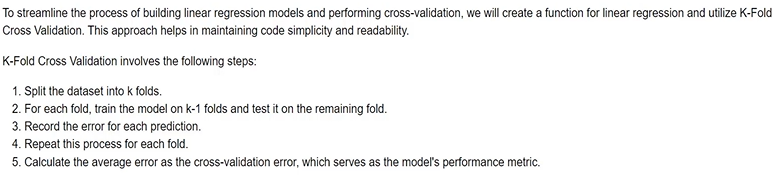

In [ ]:
def linear_regression(X, y) :
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # encoding
  X_train_encoded=pd.get_dummies(X_train)
  X_test_encoded=pd.get_dummies(X_test)

  # LinearRegression
  LR = LinearRegression()
  LR.fit(X_train_encoded, y_train)

  # make predictions
  predictions = LR.predict(X_test_encoded)

  # print shapes of the dataset
  print(X_test_encoded.shape, X_train_encoded.shape, y_test.shape, y_train.shape)

  # Plot predictions against actual values
  plt.figure(figsize=(18,10))
  plt.scatter(predictions, y_test, alpha=0.3)
  plt.xlabel('Predictions')
  plt.ylabel('AQI')
  plt.title('Linear prediction')

  plt.show()


  # Print OLS summary
  print(regressor_OLS.summary())





## **Cross validation**

In [ ]:
def cross_val(X, y) :
  #split the data
  X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

  # encoding
  X_train_encoded=pd.get_dummies(X_train)
  X_test_encoded=pd.get_dummies(X_test)

  # LinearRegression
  LR = LinearRegression()
  LR.fit(X_train_encoded, y_train)
  y_pred = LR.predict(X_test_encoded)

  # perform 10-fold cross validation(devides the training data into 10 subsets, training the model on 9 of them  and evaluate on the remaining subset)
  kfold = KFold(n_splits=10, shuffle=True)
  cv_score = cross_val_score(LR, X_train_encoded, y_train, cv=kfold).mean()
  print("Cross validation score: ", cv_score)







 #### LINEAR MODEL 1

(24146, 4) (96582, 4) (24146,) (96582,)


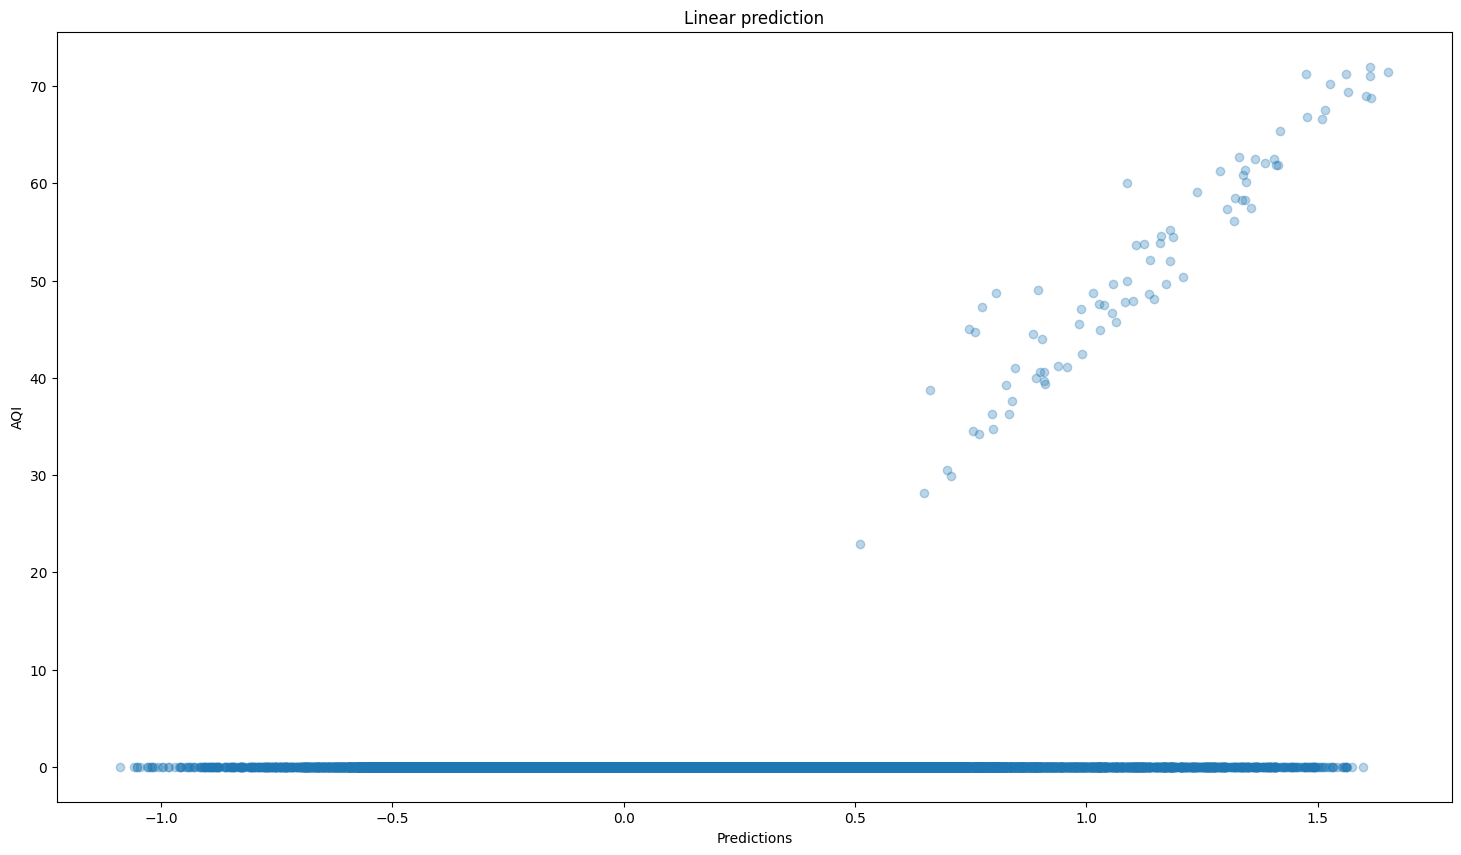

NameError: name 'regressor_OLS' is not defined

In [ ]:
x_1 = dataset[['si', 'ni', 'rpi', 'spi']]
y_1 = dataset['aqi']

linear_regression(x_1, y_1)

#### LINEAR MODEL 2

(24146, 3) (96582, 3) (24146,) (96582,)


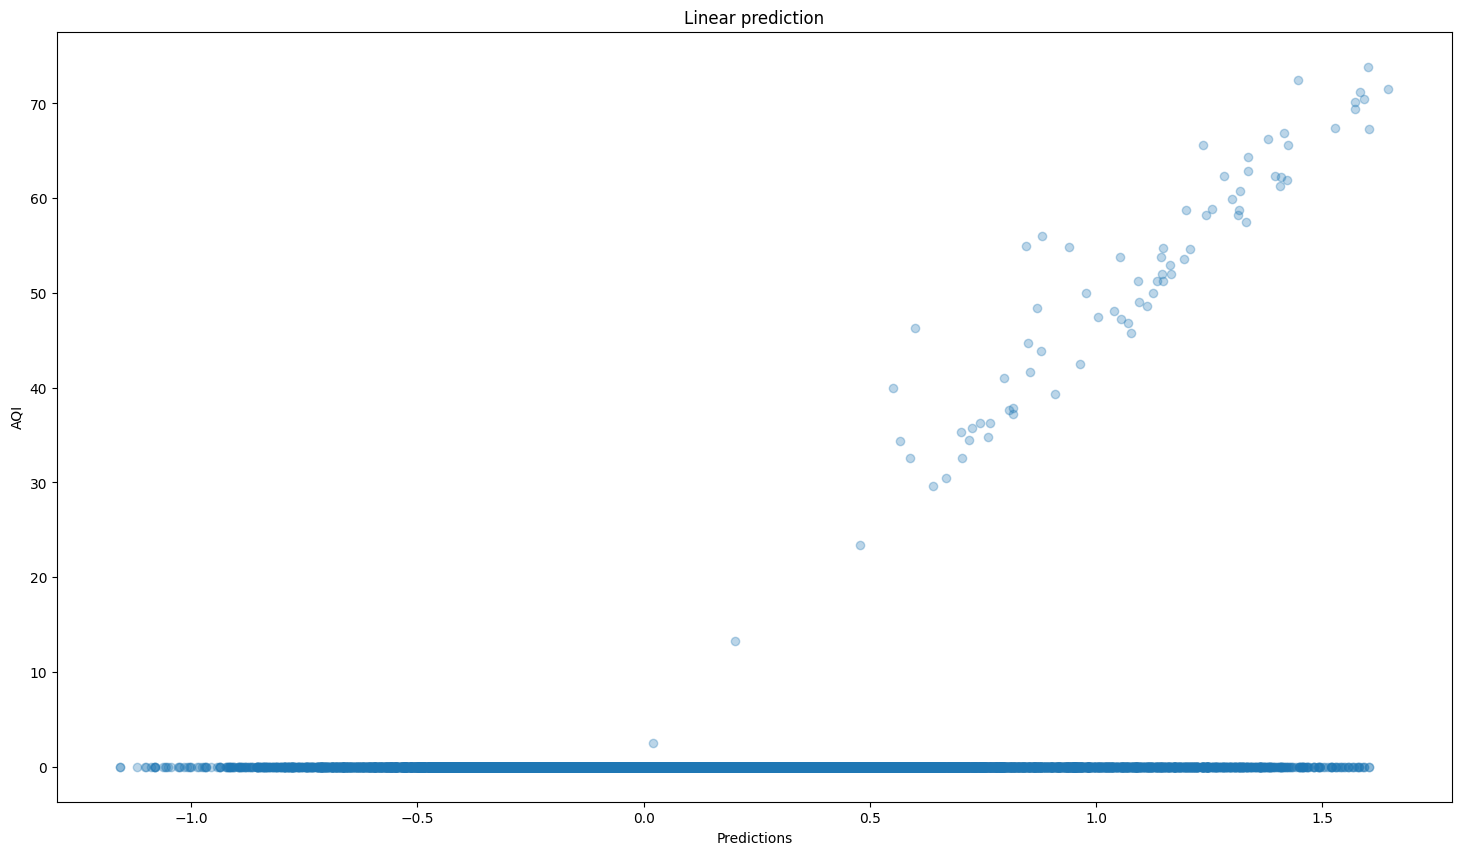

                            OLS Regression Results                            
Dep. Variable:                    aqi   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     613.5
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:49:44   Log-Likelihood:            -2.3640e+05
No. Observations:               96582   AIC:                         4.728e+05
Df Residuals:                   96578   BIC:                         4.729e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0584      0.024      2.387      0.0

In [ ]:
x_2 = dataset[['so2', 'no2', 'spm']]
y_2 = dataset['aqi']

linear_regression(x_2, y_2)

#### LINEAR MODEL 3

(24146, 4) (96582, 4) (24146,) (96582,)


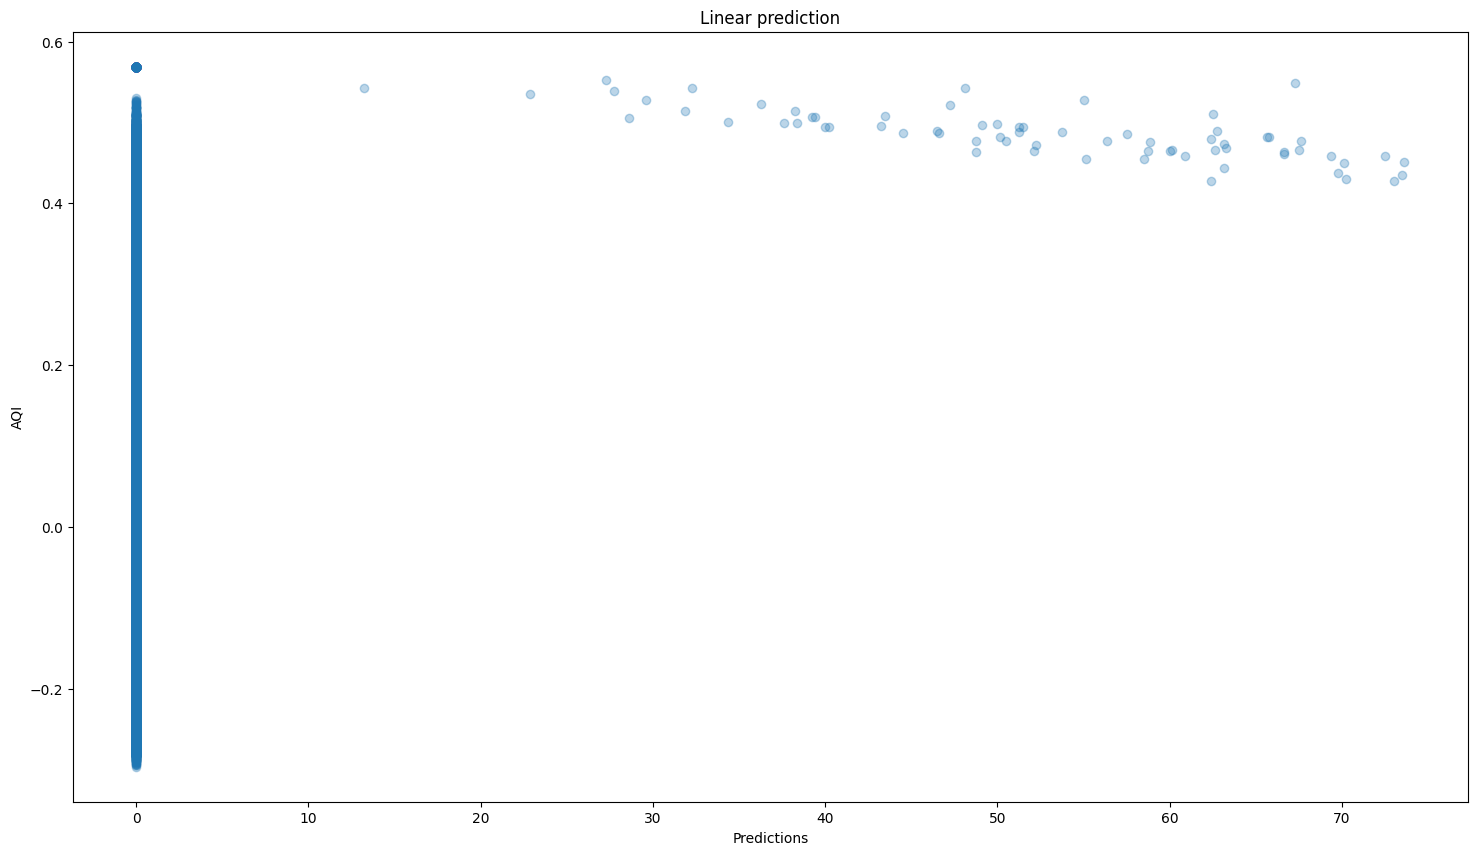

                            OLS Regression Results                            
Dep. Variable:                    aqi   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     148.5
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          7.36e-127
Time:                        08:24:33   Log-Likelihood:            -2.3765e+05
No. Observations:               96582   AIC:                         4.753e+05
Df Residuals:                   96577   BIC:                         4.754e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5689      0.021     27.598      0.0

In [ ]:
x_3 = dataset[['rspm', 'spm', 'spi', 'rpi']]
y_3 = dataset['aqi']

linear_regression(x_3, y_3)

**As you can see the predicting power of the models is not great , I will be working on improving that for the future, but feel free to modify the model and work on improving the model as well.**